In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

boston = load_boston()

In [3]:
X=pd.DataFrame(boston.data[:,:], columns=boston.feature_names)
y=pd.DataFrame(boston.target[:])
x = X['LSTAT'].values
#plt.scatter(X['LSTAT'],y) #同じ

# データ分割

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# 学習
## 入力準備

__X__
* * * 

In [5]:
# これか、
X = X_train['LSTAT'].values
#この時ははこんな感じで行列にする必要あり。
#fit関数に渡す引数xは、行列である必要があるので、x[:,None]
# X[:,None]
# これでもいけるのかな。　X = X.as_matrix()
# これも。x_test = X_test['LSTAT'].values[:,np.newaxis]

# score_1d = lin_1d.score(x_test, y_test)
#print("一次式における'LSTAT'の住宅価格への決定係数は%f" % (score_1d))

In [38]:
# これちがいある？
X = X_train[['LSTAT']]

In [39]:
print("{}, ndim {}, shape {}".format(type(X),X.ndim,X.shape))

<class 'pandas.core.frame.DataFrame'>, ndim 2, shape (404, 1)


In [41]:
# これちがいある？
X = X_train['LSTAT']

In [42]:
print("{}, ndim {}, shape {}".format(type(X),X.ndim,X.shape))

<class 'pandas.core.series.Series'>, ndim 1, shape (404,)


In [29]:
# これを使う。
X = X_train[['LSTAT']].values

In [30]:
print("{}, ndim {}, shape {}".format(type(X),X.ndim,X.shape))

<class 'numpy.ndarray'>, ndim 2, shape (404, 1)


In [31]:
X = X.reshape(-1)

In [32]:
print("{}, ndim {}, shape {}".format(type(X),X.ndim,X.shape))

<class 'numpy.ndarray'>, ndim 1, shape (404,)


__y__
* * * 

In [19]:
y = y_train.values

In [22]:
type(y)

numpy.ndarray

In [23]:
y.ndim

2

## 学習

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# 確認

__graph__

In [65]:
sort_idx

array([208, 197, 151, 400, 185, 235, 345, 397, 244,  97, 285, 349, 233,
        17,  92, 277, 346, 342, 198, 131, 323, 279, 398, 194, 284, 238,
       310, 207, 324, 117, 393, 383,  68,  86,  44, 236,  48, 157,   8,
        60,  18, 391, 220,  33, 247, 259, 298,  53, 275, 384,  40,  83,
       142, 327, 370,  49,  61,  41, 249, 138,  45, 183, 143, 294, 387,
        71, 375, 180, 210, 344, 376,  90, 330, 280, 105, 308,  96, 179,
        85,  27, 309, 364,  93, 171, 363, 126, 299, 139, 103,  24, 307,
       108,  36, 334, 215, 158, 101, 288, 271, 389, 319, 268, 302,  42,
       258, 326, 187, 283, 281, 154, 165, 204, 216,  65, 100, 231, 276,
       273, 320, 209, 250, 161, 303, 191, 356, 115,  64,  51, 251,  66,
       227, 146, 129, 368, 186, 178,  62, 188, 136,  98, 318, 361, 203,
       338, 390, 365, 369,   7, 291, 292,   6, 200,  26, 122, 385,  77,
       144, 181,  84,  94, 159, 226, 109, 155, 221, 311, 381, 224, 162,
       168,   0, 173,  80, 378,   1, 267, 230,  22, 130, 336, 19

In [67]:
# test
tx= np.arange(15).reshape(3,5)

In [74]:
tx

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

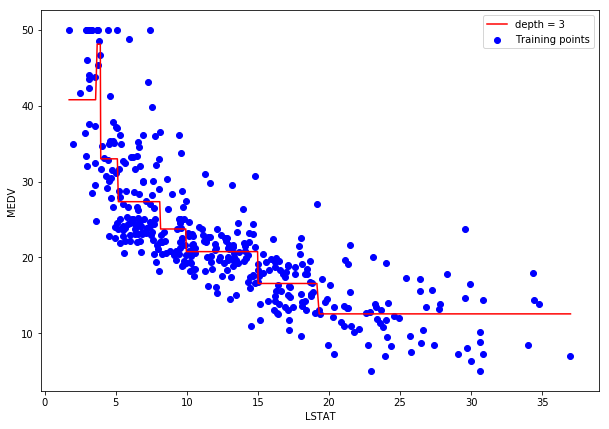

In [76]:
# プロット
plt.figure(figsize = (10, 7))
plt.plot(X[sort_idx], tree.predict(X[sort_idx].reshape(-1,1)), color = 'red', label = 'depth = 3')

plt.scatter(X[sort_idx], y[sort_idx], c = 'blue', label = 'Training points')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

__決定係数__

In [91]:
#print('Train score: {:.3f}'.format(regressor.score(X_train, y_train)))
#print('Test score: {:.3f}'.format(regressor.score(X_test, y_test)))
print('Train score: {}'.format(tree.score(X, y)))

Train score: 0.7362854637034488


In [92]:
print('Test score: {}'.format(tree.score(X_test[['LSTAT']].values, y_test.values)))

Test score: 0.5159346763007029


# 学習曲線

In [93]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


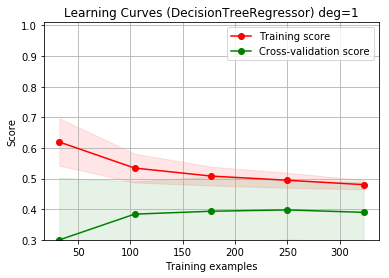

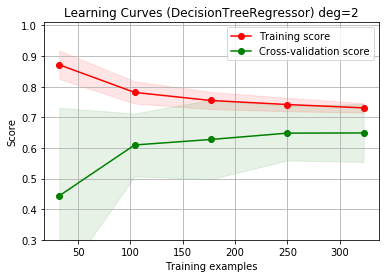

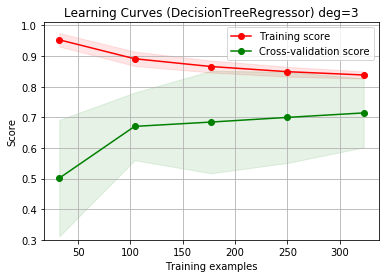

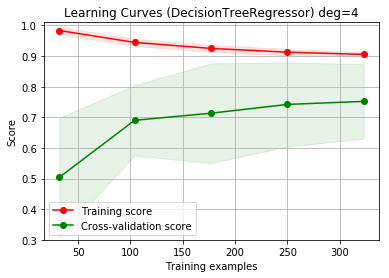

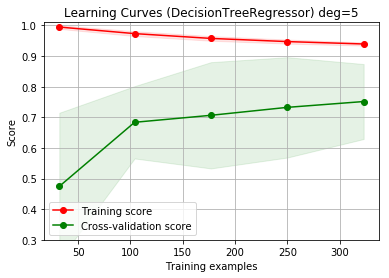

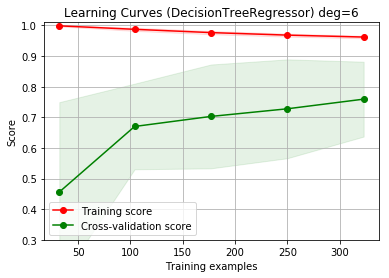

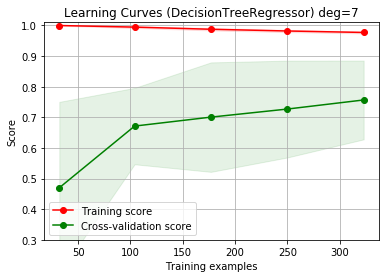

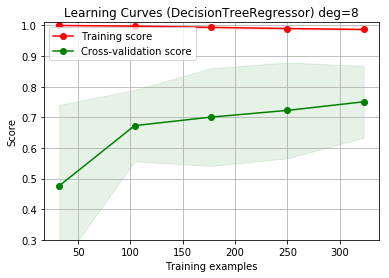

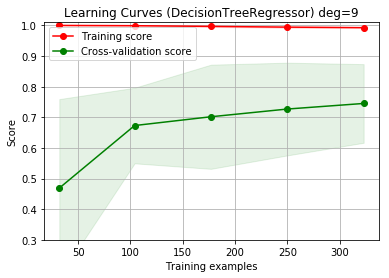

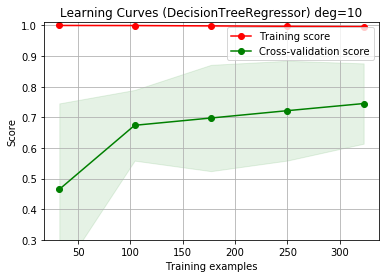

In [99]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor) deg={}"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

features = X_train
target = y_train

# ここで追加するfeaturesはtrain or all?
# 検証精度とは何か？
for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title.format(degree), features, target, ylim=(0.3, 1.01), cv=cv, n_jobs=4)